## Listelerden DataFrame Oluşturma

Listelerle işlemler yapacağız. Sütun ekleme, silme, güncelleme vb.

Veri Analizi ve matplotlib ile Veri Görselleştirmeye kısaca değineceğiz.

DataFrame Birleştirme (Merge) ve DataFrame İstifleme (Concat) yapacağız.

In [3]:
import pandas as pd 
data = {
    'Ad' : ['Ali', 'Veli', 'Ayse', 'Fatma'],
    'Yas'  : [25, 30, 22,35],
    'Sehir'  : ['Ankara', 'İstanbul', 'İzmir' , 'Bursa' ]}

df=pd.DataFrame(data)
df

,Ad,Yas,Sehir
0,Ali,25,Ankara
1,Veli,30,İstanbul
2,Ayse,22,İzmir
3,Fatma,35,Bursa


In [ ]:
df = pd.read_csv('veri_csv')    #veri_csv dosyasını okuma
df.head()

In [12]:
print(df['Ad'])
print("---------")
df[['Ad', 'Sehir']]     # Bu dış parantezler DataFrame'i ifade eder

#Eğer tek bir sütun seçilmek istenirse, df['Ad'] şeklinde bir köşeli parantez kullanılabilir.
#Ancak birden fazla sütun seçilmek isteniyorsa, sütun adları bir liste içinde belirtilir ve iki köşeli parantez (df[['Ad', 'Sehir']]) kullanılır.

0      Ali
1     Veli
2     Ayse
3    Fatma
Name: Ad, dtype: object
---------


,Ad,Sehir
0,Ali,Ankara
1,Veli,İstanbul
2,Ayse,İzmir
3,Fatma,Bursa


In [3]:
print(df.iloc[0])
print("-----------")
print(df.iloc[0:1])
print("-----------")
print(df.iloc[0:3])
#ilocta son yazılan index dahil edilmez. burada 0, 1 ve 2. indexleri yazdırırız. Fakat loc kullanıldığında dahil edilir.

Ad          Ali
Yas          25
Sehir    Ankara
Name: 0, dtype: object
-----------
    Ad  Yas   Sehir
0  Ali   25  Ankara
-----------
     Ad  Yas     Sehir
0   Ali   25    Ankara
1  Veli   30  İstanbul
2  Ayse   22     İzmir


In [4]:
yas_filtre = df[df['Yas']>25]
print(yas_filtre)
print("--------------")
sehir_filtre = df[df['Sehir'] =='Ankara']
print(sehir_filtre)

      Ad  Yas     Sehir
1   Veli   30  İstanbul
3  Fatma   35     Bursa
--------------
    Ad  Yas   Sehir
0  Ali   25  Ankara


### Veri Güncelleme

In [5]:
#df.loc[0, 'Yas'] = 88   
df

#df.loc  -->> etikete göre veri seçme (satır sütun adı)
#df.iloc -->> konumsal (integer tabanlı) indexleme

,Ad,Yas,Sehir
0,Ali,88,Ankara
1,Veli,30,İstanbul
2,Ayse,22,İzmir
3,Fatma,35,Bursa


### Yeni Sütun Eklemek

In [13]:
df['Meslek'] = ['Mühendis', 'Doktor', 'Öğretmen', 'Avukat']
df

,Ad,Yas,Sehir,Meslek
0,Ali,25,Ankara,Mühendis
1,Veli,30,İstanbul,Doktor
2,Ayse,22,İzmir,Öğretmen
3,Fatma,35,Bursa,Avukat


In [14]:
df['Gelir'] = ['100K', '80K', '55K', '70K']
df

,Ad,Yas,Sehir,Meslek,Gelir
0,Ali,25,Ankara,Mühendis,100K
1,Veli,30,İstanbul,Doktor,80K
2,Ayse,22,İzmir,Öğretmen,55K
3,Fatma,35,Bursa,Avukat,70K


### Sütun Silme

In [15]:
df = df.drop(columns=['Gelir'])
df

,Ad,Yas,Sehir,Meslek
0,Ali,25,Ankara,Mühendis
1,Veli,30,İstanbul,Doktor
2,Ayse,22,İzmir,Öğretmen
3,Fatma,35,Bursa,Avukat


### Satır Silme

In [ ]:
#df = df.drop(index=[0])
#df

# 2. Veri Analizi

In [16]:
df.describe()  #Temel istatistiksel özet

,Yas
count,4.000000
mean,28.000000
std,5.715476
min,22.000000
25%,24.250000
50%,27.500000
75%,31.250000
max,35.000000


In [17]:
#df.mean()         #ortalama değerler. 
df['Yas'].mean()   #'Yas' sütununun ortalaması

28.0

### Gruplama ve Toplulaştırma

In [19]:
print(df)
df.loc[len(df.index)+1] = ['Fatma', 23, 'İzmir', 'Pilot']
print(df)

group=df.groupby('Sehir')
sehir_grup=df.groupby('Sehir').size()
print("Her şehirdeki kişi sayısı")
print(sehir_grup)
#kodu her çalıştırdığımızda Fatmayı tekrar bir sonraki indexe ekliyor

      Ad  Yas     Sehir    Meslek
0    Ali   25    Ankara  Mühendis
1   Veli   30  İstanbul    Doktor
2   Ayse   22     İzmir  Öğretmen
3  Fatma   35     Bursa    Avukat
5  Fatma   23     İzmir     Pilot
      Ad  Yas     Sehir    Meslek
0    Ali   25    Ankara  Mühendis
1   Veli   30  İstanbul    Doktor
2   Ayse   22     İzmir  Öğretmen
3  Fatma   35     Bursa    Avukat
5  Fatma   23     İzmir     Pilot
6  Fatma   23     İzmir     Pilot
Her şehirdeki kişi sayısı
Sehir
Ankara      1
Bursa       1
İstanbul    1
İzmir       3
dtype: int64


In [7]:
len(df.index)

4

### Veri Görselleştirme

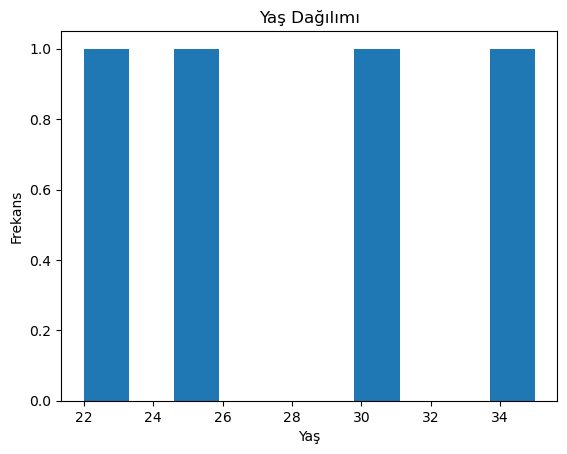

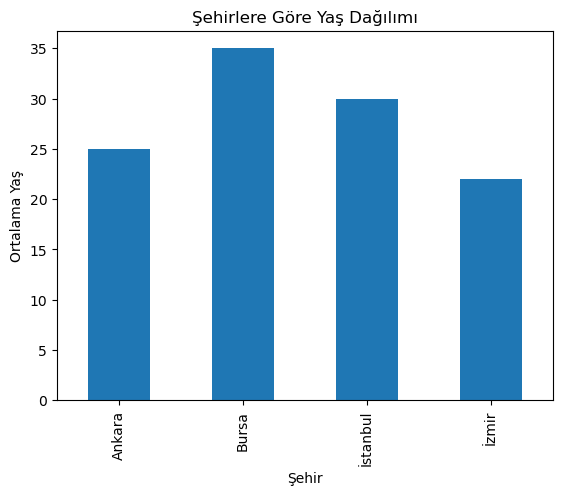

In [10]:
import matplotlib.pyplot as plt

df['Yas'].plot(kind='hist', bins=10, title='Yaş Dağılımı')    #bins parametresi, veriyi kaç adet aralığa (bin) bölmek istediğinizi belirler.
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

df.groupby('Sehir')['Yas'].mean().plot(kind='bar', title='Şehirlere Göre Yaş Dağılımı')
plt.xlabel('Şehir')
plt.ylabel('Ortalama Yaş')
plt.show()

### DataFrame Birleştirme (Merge)

In [12]:
data1 = {'Anahtar': ['K1', 'K2', 'K3'],
         'Değer1' : [1,2,3]}

data2 = {'Anahtar': ['K1', 'K2', 'K4'],
         'Değer2' : [4,5,6]}

df1=pd.DataFrame(data1)
df2=pd.DataFrame(data2)

birlesik_df = pd.merge(df1, df2, on='Anahtar', how='inner')    #bu kodu kullanmak daha mantıklıdır.
print(birlesik_df)

birlesik_df = pd.merge(df1, df2, on='Anahtar', how='outer')
print(birlesik_df)

  Anahtar  Değer1  Değer2
0      K1       1       4
1      K2       2       5
  Anahtar  Değer1  Değer2
0      K1     1.0     4.0
1      K2     2.0     5.0
2      K3     3.0     NaN
3      K4     NaN     6.0


### DataFrame İstifleme (Concat)

In [14]:
df3= pd.concat([df1, df2], axis=0)
print(df3) #alt alta ekler

df3= pd.concat([df1, df2], axis=1)
print(df3) #yan yana ekler)

  Anahtar  Değer1  Değer2
0      K1     1.0     NaN
1      K2     2.0     NaN
2      K3     3.0     NaN
0      K1     NaN     4.0
1      K2     NaN     5.0
2      K4     NaN     6.0
  Anahtar  Değer1 Anahtar  Değer2
0      K1       1      K1       4
1      K2       2      K2       5
2      K3       3      K4       6


In [ ]:
#merge inner, outer (left, right dahil) birleştirebiliyor. //can only use columns
#concat verilen axise göre tamamını birleştiriyor. alt alta ekleyince (axis=0) boş değer varsa NaN da ekliyor// can be used with either axis,index

### Csv veya Excel Dosyasına Kaydetme

In [18]:
#df3.to_excel('/Users/tuanakara/Documents/cikti.xlsx', index=False)    #macbook için

In [63]:
data = {'isim'     : ['Ali', 'Ahmet', 'Mehmet', 'Veli', 'Arda', 'Doruk'],
      'arasinav' : [5,54,12,22,15,87],
      'odev'     : [68,44,87,74,68,70],
      'final'    : [55,64,77,88,100,90]}

In [64]:
df=pd.DataFrame.from_dict(data)
df['arasinav']=df['arasinav'].astype(float)
df['odev']=df['odev'].astype(float)

df

,isim,arasinav,odev,final
0,Ali,5.0,68.0,55
1,Ahmet,54.0,44.0,64
2,Mehmet,12.0,87.0,77
3,Veli,22.0,74.0,88
4,Arda,15.0,68.0,100
5,Doruk,87.0,70.0,90


In [56]:
df['ortalama'] = df['arasinav']*0.25 + df['odev']*0.25 + df['final']*0.5
df

,isim,arasinav,odev,final,ortalama
0,Ali,5.0,68.0,55.0,45.75
1,Ahmet,54.0,44.0,64.0,56.50
2,Mehmet,12.0,87.0,77.0,63.25
3,Veli,22.0,74.0,88.0,68.00
4,Arda,15.0,68.0,100.0,70.75
5,Doruk,87.0,70.0,90.0,84.25


In [20]:
#Excel dosyalarını okuyarak DataFrame oluşturma
musteriler = pd.read_excel("musteriler.xlsx")
satislar = pd.read_excel("satislar.xlsx")
#musteriler.xlsx ve satislar.xls dosyaları upload edildikten sonra burada kullanılabilir.

In [22]:
#DataFrameleri birleştirme
birlesik_df = pd.merge(musteriler, satislar, on='MüşteriID', how='inner')
birlesik_df

,MüşteriID,Ad,Soyad,Şehir,SatışID,ÜrünAdı,Miktar,BirimFiyat
0,1,Ali,Yılmaz,İstanbul,101,Laptop,1,5000
1,1,Ali,Yılmaz,İstanbul,103,Tablet,1,1500
2,2,Veli,Can,Ankara,102,Telefon,2,3000
3,2,Veli,Can,Ankara,105,Telefon,1,3000
4,3,Ayşe,Demir,İzmir,104,Laptop,1,4500
5,4,Fatma,Kaya,Bursa,106,Kulaklık,5,200


In [24]:
#Her müşterinin toplam harcaması
birlesik_df['ToplamHarcama'] = birlesik_df['Miktar']*birlesik_df['BirimFiyat']
birlesik_df

,MüşteriID,Ad,Soyad,Şehir,SatışID,ÜrünAdı,Miktar,BirimFiyat,ToplamHarcama
0,1,Ali,Yılmaz,İstanbul,101,Laptop,1,5000,5000
1,1,Ali,Yılmaz,İstanbul,103,Tablet,1,1500,1500
2,2,Veli,Can,Ankara,102,Telefon,2,3000,6000
3,2,Veli,Can,Ankara,105,Telefon,1,3000,3000
4,3,Ayşe,Demir,İzmir,104,Laptop,1,4500,4500
5,4,Fatma,Kaya,Bursa,106,Kulaklık,5,200,1000


In [93]:
#Her müşterinin toplam harcamasını yeni bir DataFrame olarak oluşturma
toplam_harcama= birlesik_df.groupby('MüşteriID')['ToplamHarcama'].sum()
toplam_harcama

MüşteriID
1    6500
2    9000
3    4500
4    1000
Name: ToplamHarcama, dtype: int64

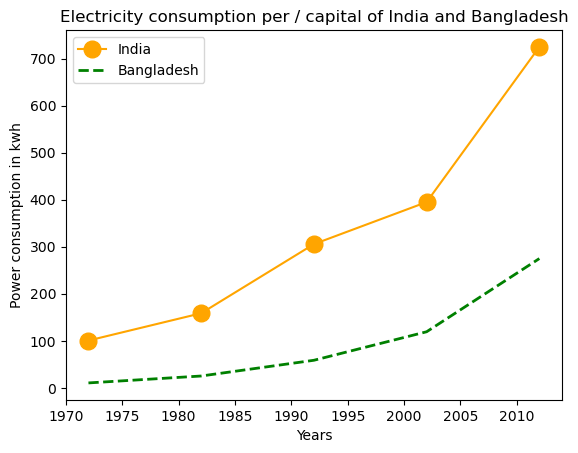

In [26]:
#Veri Görselleştirme
year = [1972, 1982, 1992, 2002, 2012]
e_india = [100.6, 158.61, 305.54, 394.96, 724.79]
e_bangladesh = [10.5, 25.21, 58.65, 119.27, 274.87]

#çizgi stilinin biçimlendirilmesi ve koordinatların çizdirilmesi
plt.plot(year, e_india, color="orange", marker="o", markersize=12, label="India")

plt.plot(year, e_bangladesh, color="g", linestyle="dashed", linewidth=2, label="Bangladesh")

plt.xlabel('Years')
plt.ylabel('Power consumption in kwh')

plt.title('Electricity consumption per / capital of India and Bangladesh')

plt.legend()
plt.show()